In [36]:
import pandas as pd
import matplotlib as mpl
import plotly.express as px
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (15,8)
mpl.rcParams['axes.grid']= False

#### Importing the required dataset

In [2]:
df = pd.read_excel('https://query.data.world/s/nieb244fykxkgexttihvfs57w7f4rt')

In [3]:
df.head()

,Quarter,Revenue (US $M),Net Income (US $M)
0,2020-03-31,"$75,452","$2,535"
1,2019-12-31,"$87,437","$3,268"
2,2019-09-30,"$69,981","$2,134"
3,2019-06-30,"$63,404","$2,625"
4,2019-03-31,"$59,700","$3,561"


In [9]:
df.rename(columns={'Revenue (US $M)':'Revenue','Net Income (US $M)':'Net Income'},inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Quarter     61 non-null     datetime64[ns]
 1   Revenue     61 non-null     object        
 2   Net Income  61 non-null     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.6+ KB


In [15]:
df[['Revenue','Net Income']] = df[['Revenue','Net Income']].replace({'\$':'',',':''},regex=True).astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Quarter     61 non-null     datetime64[ns]
 1   Revenue     61 non-null     int64         
 2   Net Income  61 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.6 KB


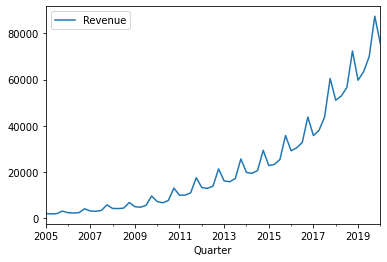

In [21]:
df.plot('Quarter','Revenue')

In [22]:
amazon_df = df.set_index('Quarter')

In [23]:
amazon_df.head()

,Revenue,Net Income
Quarter,,
2020-03-31,75452,2535
2019-12-31,87437,3268
2019-09-30,69981,2134
2019-06-30,63404,2625
2019-03-31,59700,3561


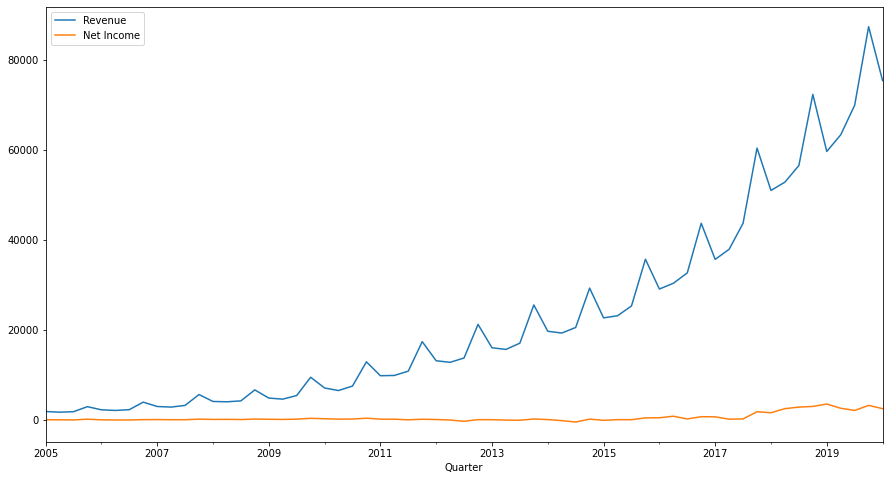

In [26]:
amazon_df.plot()

In [28]:
fig = px.line(df, x='Quarter', y='Revenue', title='Amazon Revenue Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

#### Testing for Stationarity

In [29]:
from statsmodels.tsa.stattools import kpss

KPSS test is a statistical test to check for stationarity of a series around a deterministic trend

Null hypothesis - data is stationary \
Alternate hypothesis - data is not stationary

In [30]:
tstest = kpss(amazon_df['Revenue'],'ct')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'



In [31]:
tstest

(0.170051682108309,
 0.029956931576409152,
 11,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

From the given test, we can see that p-value is 0.029956931576409152. So we reject the Null Hypothesis.

Our time series has a multiplicative seasonality, so we decompose it using seasonal_decompose method.

In [32]:
import statsmodels.api as sm

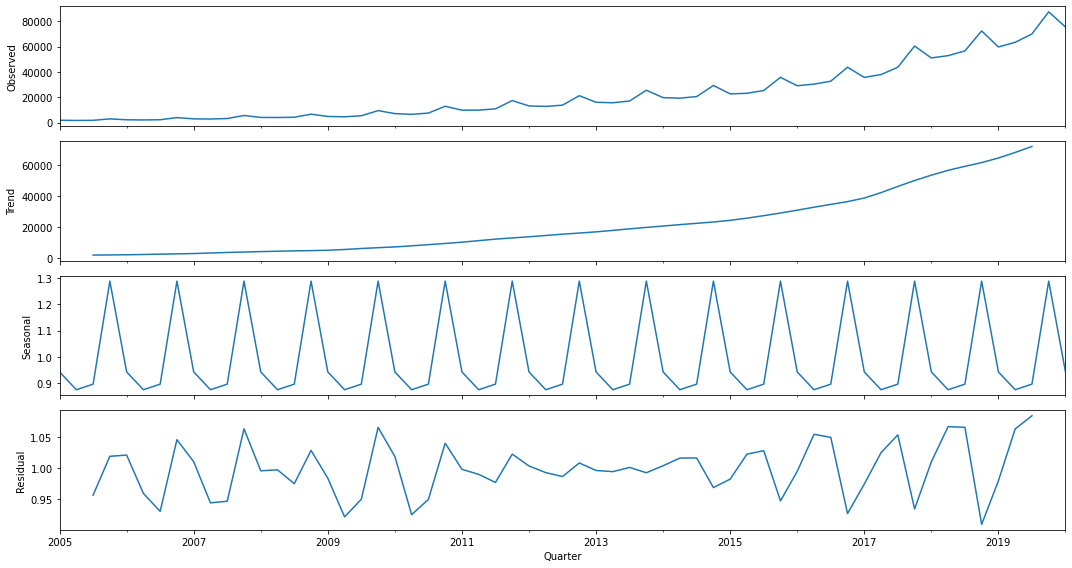

In [33]:
res = sm.tsa.seasonal_decompose(amazon_df['Revenue']
                                ,model='multiplicative')
resplot = res.plot()

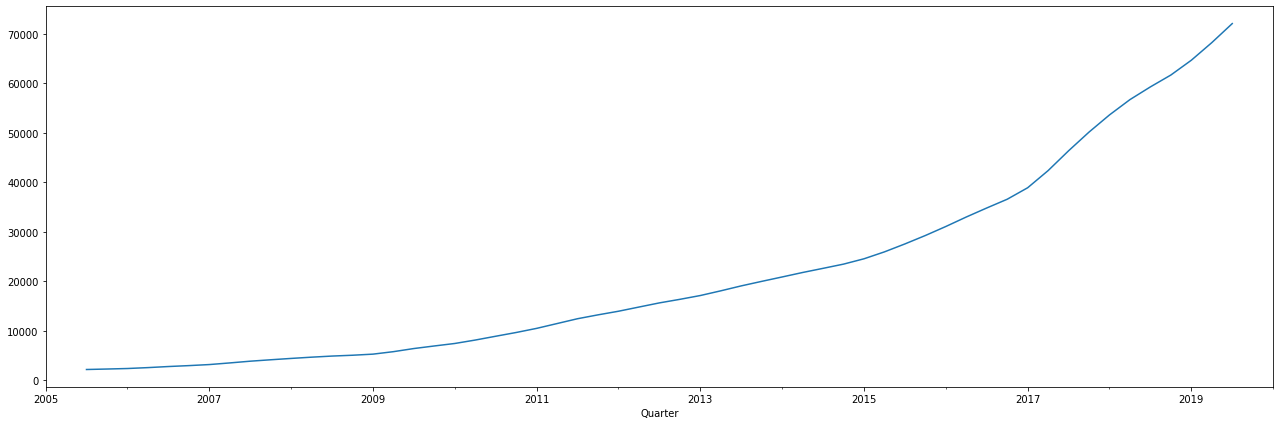

In [38]:
plt.figure(figsize=(22,7))
res.trend.plot()

In [39]:
res.observed

Quarter
2020-03-31    75452
2019-12-31    87437
2019-09-30    69981
2019-06-30    63404
2019-03-31    59700
              ...  
2006-03-31     2279
2005-12-31     2977
2005-09-30     1858
2005-06-30     1753
2005-03-31     1902
Name: Revenue, Length: 61, dtype: int64

In [40]:
print(res.trend)

Quarter
2020-03-31          NaN
2019-12-31          NaN
2019-09-30    72099.500
2019-06-30    68248.750
2019-03-31    64691.375
                ...    
2006-03-31     2369.375
2005-12-31     2265.000
2005-09-30     2169.625
2005-06-30          NaN
2005-03-31          NaN
Name: Revenue, Length: 61, dtype: float64


Any point in time series is the multiplication of the decompostion parts.

In [41]:
#Trended
res.trend[2]*res.seasonal[2]*res.resid[2]

69980.99999999999

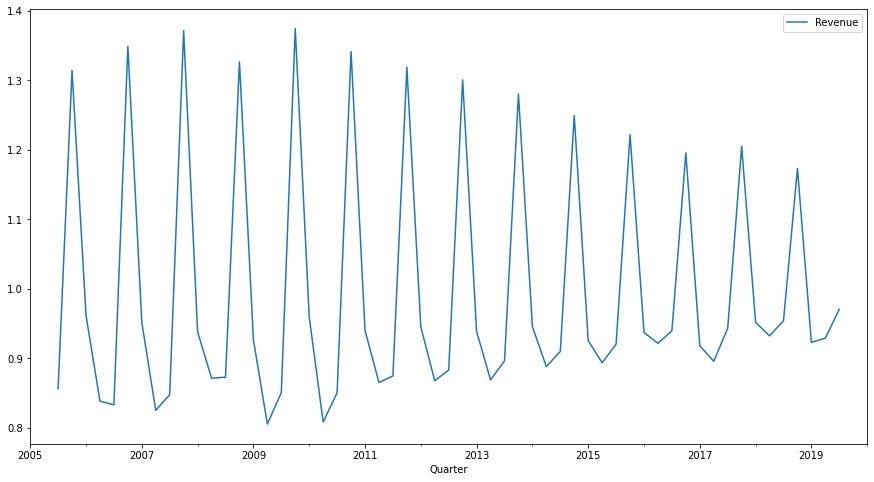

In [42]:
#De-trended
pd.DataFrame(res.observed/res.trend).plot()